In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [4]:
plt.style.use('seaborn-v0_8')
sns.set_style('darkgrid')

In [5]:
prices = pd.read_csv('vbr100_10_13.csv', index_col=0)
stocks = prices.columns
returns = prices.pct_change().dropna()
log_prices = np.log(prices)
log_returns = log_prices.diff().dropna()

In [6]:
prices

TRN       BDN        CMC        NYT        LEG        VNO  \
Date                                                                          
2010-01-04   5.074391  6.121564  11.263721  12.047388  12.885168  31.614489   
2010-01-05   5.116560  6.181475  11.079533  12.444963  12.746952  31.375183   
2010-01-06   5.124993  6.257718  11.393646  12.722336  12.897734  31.248772   
2010-01-07   5.105316  6.317631  11.300840  13.129158  13.312369  31.731880   
2010-01-08   5.200899  6.290399  12.150365  13.045943  13.306088  31.379698   
...               ...       ...        ...        ...        ...        ...   
2012-12-21  10.465487  7.582555  11.729472   7.979203  19.506910  40.260334   
2012-12-24  10.424457  7.569917  11.760832   7.840510  19.419664  40.245190   
2012-12-26  10.418596  7.569917  11.737310   7.701820  19.397854  39.977661   
2012-12-27  10.383429  7.658380  11.651063   7.646347  19.434208  40.149284   
2012-12-28  10.298437  7.626785  11.298240   7.618608  19.223358  40.013004   

                  HLX       ORI         HP        EQC  ...          M    ON  \
Date                                                   ...                    
2010-01-04  12.400000  4.613055  27.091627  13.959521  ...  11.506025  8.87   
2010-01-05  13.020000  4.594893  28.672731  14.111966  ...  11.371142  8.79   
2010-01-06  13.310000  4.599433  29.718193  14.373299  ...  11.533005  8.90   
2010-01-07  13.190000  4.694783  29.905342  14.395079  ...  11.796043  8.89   
2010-01-08  13.280000  4.690242  30.976627  14.133744  ...  11.411609  8.89   
...               ...       ...        ...        ...  ...        ...   ...   
2012-12-21  20.400000  5.771543  36.992279  11.167145  ...  26.400908  6.84   
2012-12-24  20.299999  5.815683  36.710384  11.139554  ...  26.407948  6.80   
2012-12-26  20.350000  5.870862  36.546513  11.118863  ...  26.133450  6.89   
2012-12-27  20.209999  5.843274  36.303947  10.870550  ...  26.098253  6.86   
2012-12-28  20.049999  5.810167  35.766411  10.856755  ...  26.295336  6.85   

                  GPS          X        MRO        XRX       JNPR        CAR  \
Date                                                                           
2010-01-04  14.912265  52.611492  15.145136  15.833950  22.680815  13.230000   
2010-01-05  15.093769  52.538826  15.159284  15.852304  22.321999  13.170000   
2010-01-06  15.275270  54.873684  15.494159  15.705513  21.721182  13.050000   
2010-01-07  14.716247  55.337009  15.399832  15.778908  21.829662  13.000000   
2010-01-08  14.810622  59.361683  15.423415  15.723865  21.904766  13.040000   
...               ...        ...        ...        ...        ...        ...   
2012-12-21  24.088343  22.130739  26.492781  13.643187  16.831205  20.170000   
2012-12-24  24.088343  22.241667  26.185621  13.507720  16.697689  20.120001   
2012-12-26  23.343504  22.426550  25.997906  13.352904  16.597553  19.680000   
2012-12-27  23.566185  21.853413  25.869915  13.222429  16.514109  19.510000   
2012-12-28  23.462099  21.289513  25.434771  13.027698  16.171974  19.379999   

                  RAD       SLM  
Date                             
2010-01-04  29.799999  3.624850  
2010-01-05  31.400000  3.671967  
2010-01-06  33.200001  3.693954  
2010-01-07  32.599998  3.816458  
2010-01-08  32.599998  3.656261  
...               ...       ...  
2012-12-21  24.600000  5.575950  
2012-12-24  26.200001  5.566005  
2012-12-26  28.200001  5.546114  
2012-12-27  28.799999  5.559374  
2012-12-28  27.799999  5.569321  

[753 rows x 100 columns]

In [7]:
form_start = '2010-01-01'
form_end = '2011-12-31'
trade_start = '2012-01-01'
trade_end = '2012-12-31'

prices_form = prices.loc[form_start:form_end]
prices_trade = prices.loc[trade_start:trade_end]
log_prices_form = log_prices.loc[form_start:form_end]
log_prices_trade = log_prices.loc[trade_start:trade_end]
log_returns_form = log_returns.loc[form_start:form_end]
log_returns_trade = log_returns.loc[trade_start:trade_end]
returns_form = returns.loc[form_start:form_end]
returns_trade = returns.loc[trade_start:trade_end]

# Johansen test

In [8]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
res = coint_johansen(log_prices[[stocks[0], stocks[1], stocks[2], stocks[3]]], det_order=0, k_ar_diff=1)

In [7]:
res.lr2

array([21.19033283, 14.74902549,  5.97547999,  3.17308827])

In [8]:
res.cvm

array([[25.1236, 27.5858, 32.7172],
       [18.8928, 21.1314, 25.865 ],
       [12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [9]:
res.cvm[:,-1]

array([32.7172, 25.865 , 18.52  ,  6.6349])

In [10]:
res.lr2 > res.cvm[:,-2]

array([False, False, False, False])

# Search for a portfolio of four cointegrated stocks

In [11]:
from itertools import combinations

combs = []

# save all possible quadruplets
for c in combinations(stocks, 4):
    combs.append(c)

# convert to dataframe
combs = np.array(combs)
combs = pd.DataFrame(combs, columns=['s1','s2','s3','s4'])

In [12]:
len(combs)

3921225

In [13]:
index = list(combs.index)

num_pfs = 1 # number of portfolios to select
selected_quad = []
selected_stocks = []
from tqdm import tqdm
# 创建一个tqdm对象
pbar = tqdm(total=len(index))

while len(selected_quad)<num_pfs and len(index)>0:
    i = random.choice(index) # choose random quadruplet
    s1,s2,s3,s4 = combs.loc[i] # parse stocks in quadruplet
    index.remove(i) # remove processed row
    
    try:
        res = coint_johansen(log_prices[[s1,s2,s3,s4]], det_order=0, k_ar_diff=1)
    except:
        continue
    
    if sum(res.lr2 > res.cvm[:,-2]) == 4: # if null is rejected at 95% level
        print(f'{s1}-{s2}-{s3}-{s4}')
        selected_quad.append([s1,s2,s3,s4])
        selected_stocks.extend([s1,s2,s3,s4])

        # remove all quadruplets containing already selected stocks
        for s in [s1,s2,s3,s4]:
            for c in combs.columns:
                combs = combs.loc[~(combs[c]==s)]
                index = list(set(index).intersection(set(combs.index)))
    # 更新进度条
    pbar.update(1)
# 关闭进度条
pbar.close()
        #print(f'{len(index)} items left')

  1%|          | 40582/3921225 [23:03<32:23:47, 33.27it/s] 

CMC-ZION-LNC-NYCB


  1%|          | 40585/3921225 [23:27<37:23:39, 28.83it/s]  


In [25]:
selected_quad

[['ZION', 'NUAN', 'FHN', 'PBCT']]

In [26]:
s1,s2,s3,s4 = ['ZION', 'NUAN', 'FHN', 'PBCT']

In [27]:
res = coint_johansen(log_prices[[s1,s2,s3,s4]], det_order=0, k_ar_diff=1)

In [28]:
res.lr2 > res.cvm[:,-2]

array([ True,  True,  True,  True])

# In-sample test

In [29]:
res.eig

array([0.05799753, 0.02972869, 0.02302487, 0.00971319])

In [30]:
res.evec

array([[  8.31153965,  -7.53847413,   2.32435793,  -1.45834835],
       [ -2.95227189,   2.71512731,   6.03305414,   2.32877091],
       [ -8.06591883,   9.5644762 ,   5.17569299,  -4.0983486 ],
       [  0.25990653, -25.51656532, -10.39557113,   8.6470038 ]])

In [31]:
res.evec[:,0]

array([ 8.31153965, -2.95227189, -8.06591883,  0.25990653])

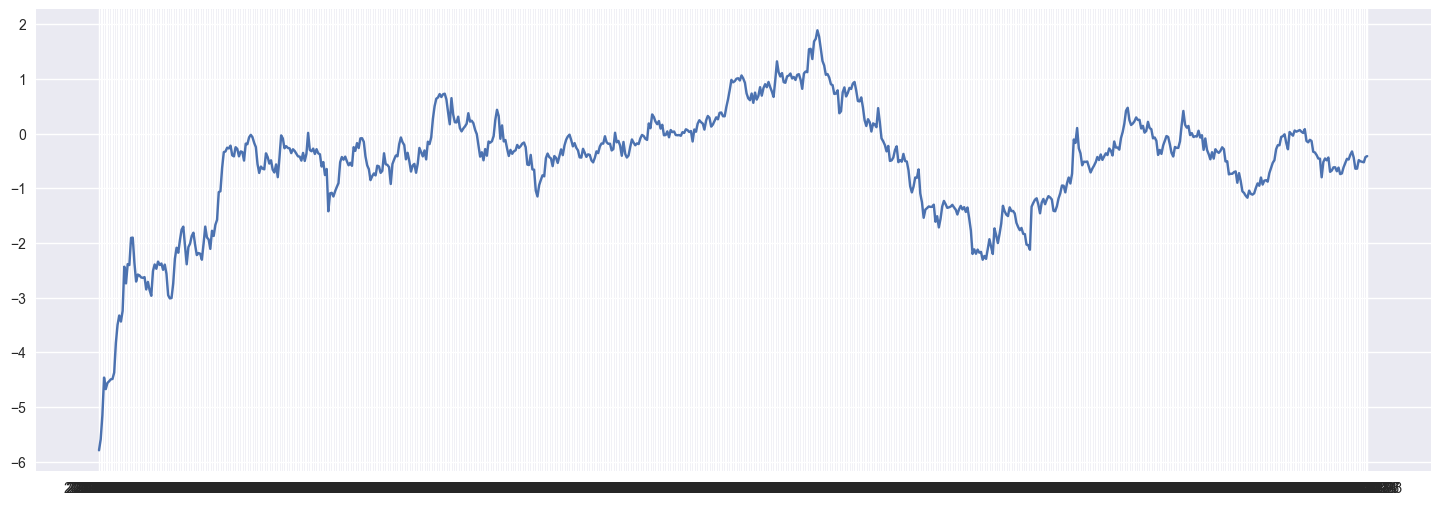

In [32]:
# create cointegrated portfolio
pf = (res.evec[:,0] * log_prices[[s1,s2,s3,s4]]).sum(axis=1)
plt.figure(figsize=(18,6))
plt.plot(pf)

In [33]:
# check for stationarity
from statsmodels.tsa.stattools import adfuller
adfuller(pf)

(-5.262776930486716,
 6.536354941303519e-06,
 0,
 752,
 {'1%': -3.439075747702915,
  '5%': -2.8653910653234655,
  '10%': -2.568820711931304},
 -641.3534604748986)

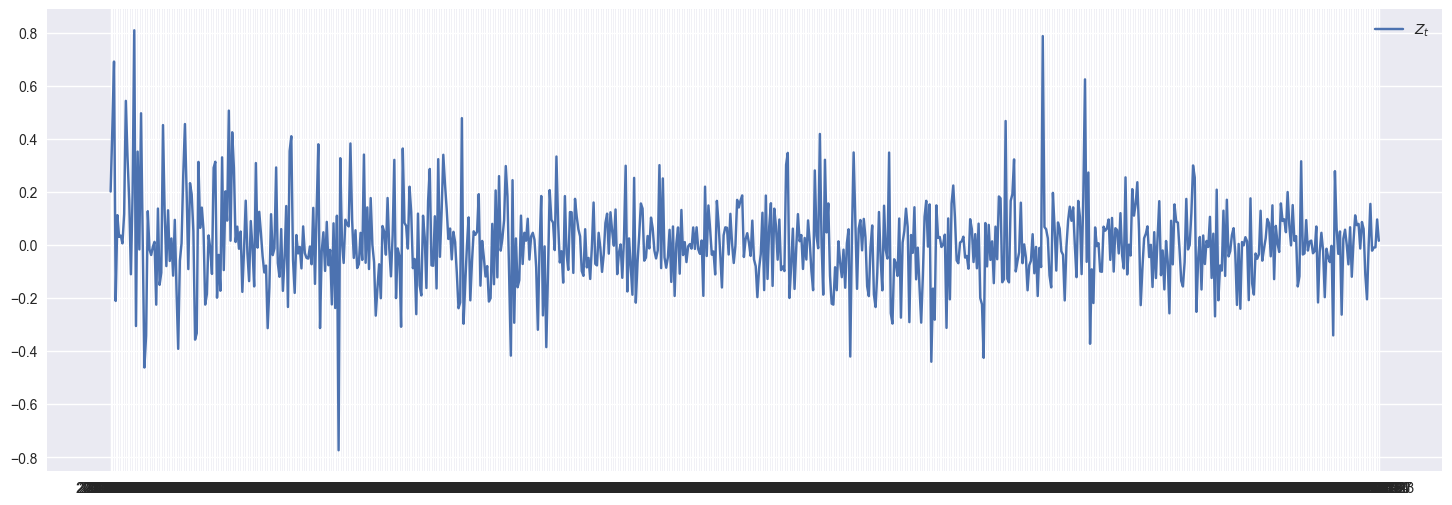

In [34]:
b = res.evec[:,0]
Z = (b * log_returns[[s1,s2,s3,s4]]).sum(axis=1)

plt.figure(figsize=(18,6))
plt.plot(Z, label=r'$Z_t$')
plt.legend()

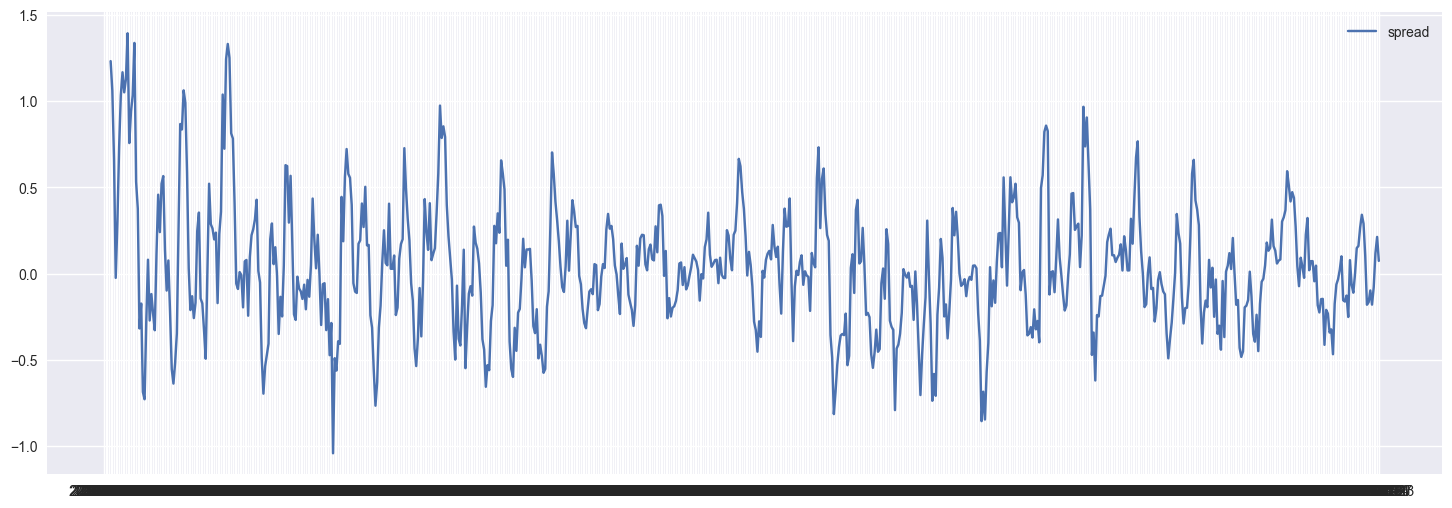

In [35]:
P = 5 # max lag parameter
spread = Z.rolling(P).sum()

plt.figure(figsize=(18,6))
plt.plot(spread, label='spread')
plt.legend()

In [36]:
weights = res.evec[:,0]
weights[weights>0] /= sum(weights[weights>0])
weights[weights<0] /= sum(abs(weights[weights<0]))
weights

array([ 0.96967763, -0.26794525, -0.73205475,  0.03032237])

In [37]:
spread = spread.dropna()
positions = pd.DataFrame(index=spread.index, columns=[s1,s2,s3,s4])
positions[spread>0] = -weights # short position
positions[spread<0] = weights # long position

In [38]:
ret_is = (positions.shift() * returns[[s1,s2,s3,s4]]).sum(axis=1) * 2 # double the amount of capital

In [39]:
cumret_is = np.nancumprod(ret_is+1)
# cumulative returns of each stock
cumret_all = (prices.pct_change().dropna() + 1).cumprod(axis=0)
# cumulative returns of buy and hold strategy
cumret_bnh = (1/4 * cumret_all[[s1,s2,s3,s4]]).sum(axis=1)
# simple returns of buy and hold strategy
ret_bnh = cumret_bnh.pct_change().dropna()

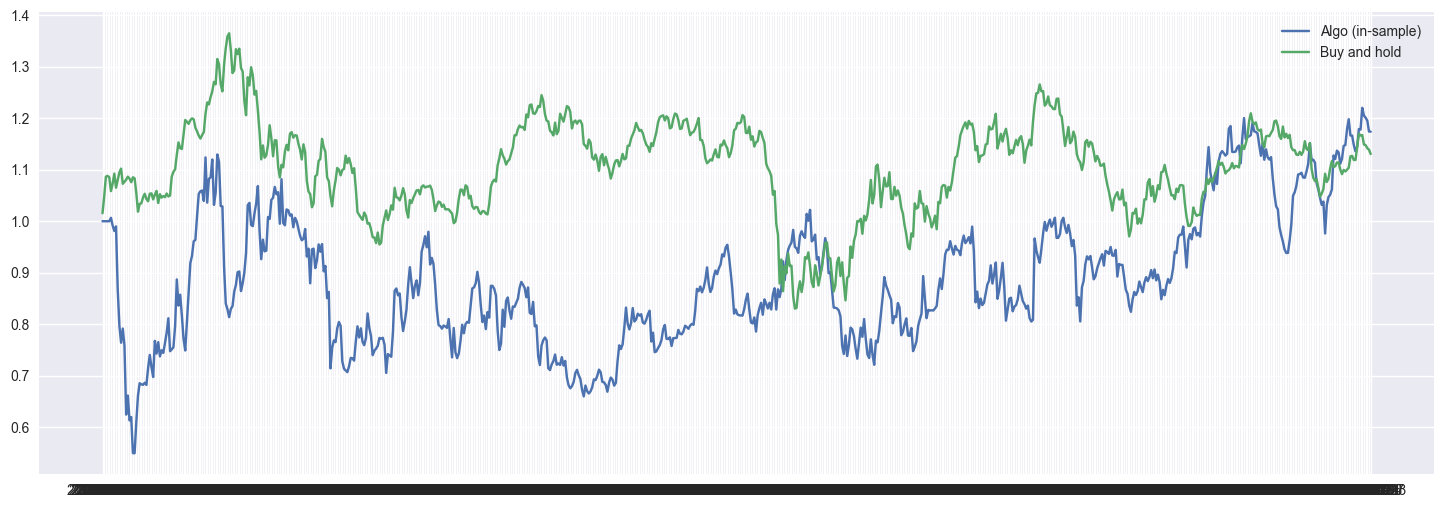

In [40]:
plt.figure(figsize=(18,6))
plt.plot(cumret_is, label='Algo (in-sample)')
plt.plot(cumret_bnh, label='Buy and hold')
plt.legend()

In [23]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [21]:
def shuffle_positions(positions_df):
    
    positions = positions_df.copy().values
    
    # shuffle positions within each column
    for col in range(positions.shape[1]):
        split =  np.split(positions[:,col], np.where((np.diff(positions[:,col]) != 0))[0]+1)
        pos = [x for x in split if x[0]!=0] # all non-zero positions
        pos_length = sum([len(x) for x in pos]) # total length in days
        zero_length = len(positions[:,col]) - pos_length
        pos += np.split(np.array([0]*zero_length), np.arange(1,zero_length))
        random.shuffle(pos)
        pos = np.concatenate(pos).astype(int)
        positions[:,col] = pos
    # shuffle columns
    np.random.shuffle(np.transpose(positions))
    
    shuffled_df = pd.DataFrame(positions, index=positions_df.index, columns=positions_df.columns)
    
    return shuffled_df

In [43]:
bootstrap_trs = [] # total returns
N = 5000 # number of random tests

for _ in range(N):
    positions_bootstrap = shuffle_positions(positions)
    ret = (positions_bootstrap.shift() * returns[[s1,s2,s3,s4]]).sum(axis=1) * 2 # double the amount of capital
    cumret_bootstrap = np.nancumprod(ret+1)
    bootstrap_trs.append(calculate_metrics(cumret_bootstrap)[0]) # save total return
    
bootstrap_trs = np.array(bootstrap_trs)

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rets = pd.DataFrame(cumret).pct_change()
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:8: RuntimeWarning: invalid value encountered in scalar divide
  sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rets = pd.DataFrame(cumret).pct_change()
/var/folders/44/1ps5

In [44]:
results_df = pd.DataFrame(columns=['Total return', 'APR', 'Sharpe', 
                                   'maxDD', 'maxDDD', '% random portfolios beaten'])
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s1])
pct_beaten = 'NA'
results_df.loc[s1] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s2])
results_df.loc[s2] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s3])
results_df.loc[s3] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s4])
results_df.loc[s4] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_bnh)
results_df.loc['Buy and hold'] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (cumret[-1] - cumret[0])/cumret[0]
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [45]:
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_is)
pct_beaten = 100 * (1 - len(bootstrap_trs[bootstrap_trs>total_return]) / len(bootstrap_trs))
results_df.loc['Algo (in-sample)'] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51535/4134292835.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rets = pd.DataFrame(cumret).pct_change()


In [46]:
results_df

Total return       APR    Sharpe     maxDD  maxDDD  \
ZION                  0.540337  0.155769  0.554798 -0.542741   676.0   
NUAN                  0.345846  0.104656  0.454348 -0.358292   222.0   
FHN                  -0.267991 -0.099262 -0.090281 -0.636678   683.0   
PBCT                 -0.180163 -0.064401 -0.187769 -0.328042   748.0   
Buy and hold          0.113245  0.036604  0.270171 -0.391787   676.0   
Algo (in-sample)      0.174008  0.055230  0.374040 -0.454399   586.0   

                 % random portfolios beaten  
ZION                                     NA  
NUAN                                     NA  
FHN                                      NA  
PBCT                                     NA  
Buy and hold                             NA  
Algo (in-sample)                      100.0

In [28]:
def calculate_metrics_add(ret):
    '''
    calculate performance metrics from returns
    '''
    best_day = np.max(ret)
    worst_day = np.min(ret)
    pct_days_up = len(ret[ret>0]) / len(ret)
    pct_days_down = len(ret[ret<0]) / len(ret)
    avg_daily_gain = np.mean(ret[ret>0])
    sd_pos_ret = np.std(ret[ret>0])
    avg_daily_loss = np.mean(ret[ret<0])
    sd_neg_ret = np.std(ret[ret<0])
    
    return best_day, worst_day, pct_days_up, pct_days_down, avg_daily_gain, sd_pos_ret, avg_daily_loss, sd_neg_ret

In [48]:
metrics = ['Best day', 'Worst day', 'Percentage of up days', 'Percentage of down days', 
           'Average daily gain', 'SD of positive returns', 'Average daily loss', 
           'SD of negative returns']

results_add_df = pd.DataFrame(index=metrics, columns=['Algo (in-sample)', 'Buy and hold', s1,s2,s3,s4])

In [49]:
results_add_df['Algo (in-sample)'] = calculate_metrics_add(ret_is)
results_add_df['Buy and hold'] = calculate_metrics_add(ret_bnh)
results_add_df[s1] = calculate_metrics_add(returns[s1])
results_add_df[s2] = calculate_metrics_add(returns[s2])
results_add_df[s3] = calculate_metrics_add(returns[s3])
results_add_df[s4] = calculate_metrics_add(returns[s4])

In [50]:
results_add_df

Algo (in-sample)  Buy and hold      ZION      NUAN  \
Best day                         0.195742      0.066501  0.112000  0.092544   
Worst day                       -0.176847     -0.097135 -0.108768 -0.129885   
Percentage of up days            0.527926      0.513981  0.501330  0.486702   
Percentage of down days          0.465426      0.486019  0.492021  0.497340   
Average daily gain               0.024190      0.013921  0.020515  0.018223   
SD of positive returns           0.022126      0.012378  0.018490  0.016502   
Average daily loss              -0.025699     -0.014064 -0.018930 -0.016445   
SD of negative returns           0.025696      0.012792  0.017085  0.015563   

                              FHN      PBCT  
Best day                 0.078526  0.057621  
Worst day               -0.105820 -0.087362  
Percentage of up days    0.496011  0.489362  
Percentage of down days  0.486702  0.493351  
Average daily gain       0.017744  0.010343  
SD of positive returns   0.014424  0.009136  
Average daily loss      -0.018345 -0.010579  
SD of negative returns   0.016626  0.009868

In [51]:
corr_df = pd.DataFrame(index=[s1,s2,s3,s4], columns=['Algo (in-sample)'])

for s in corr_df.index:
    corr_df.loc[s] = np.corrcoef(returns[s], ret_is.astype(float))[0,1]
    
corr_df

Algo (in-sample)
ZION         0.027637
NUAN         0.030014
FHN          0.079765
PBCT          0.06451

In [52]:
returns[[s1,s2,s3,s4]].corr()

ZION      NUAN       FHN      PBCT
ZION  1.000000  0.496608  0.700757  0.613948
NUAN  0.496608  1.000000  0.439857  0.474548
FHN   0.700757  0.439857  1.000000  0.641972
PBCT  0.613948  0.474548  0.641972  1.000000

# Out-of-sample test

In [53]:
combs = []

# save all possible quadruplets
for c in combinations(stocks, 4):
    combs.append(c)

# convert to dataframe
combs = np.array(combs)
combs = pd.DataFrame(combs, columns=['s1','s2','s3','s4'])

In [14]:
index = list(combs.index)

num_pfs = 1 # number of portfolios to select
selected_quad = []
selected_stocks = []

from tqdm import tqdm
# 创建一个tqdm对象
pbar = tqdm(total=len(index))

while len(selected_quad)<num_pfs and len(index)>0:
    i = random.choice(index) # choose random quadruplet
    s1,s2,s3,s4 = combs.loc[i] # parse stocks in quadruplet
    index.remove(i) # remove processed row
    
    try:
        res = coint_johansen(log_prices_form[[s1,s2,s3,s4]], det_order=0, k_ar_diff=1)
    except:
        continue
    
    if sum(res.lr2 > res.cvm[:,-2]) == 4: # if null is rejected at 95% level
        print(f'{s1}-{s2}-{s3}-{s4}')
        selected_quad.append([s1,s2,s3,s4])
        selected_stocks.extend([s1,s2,s3,s4])

        # remove all quadruplets containing already selected stocks
        for s in [s1,s2,s3,s4]:
            for c in combs.columns:
                combs = combs.loc[~(combs[c]==s)]
                index = list(set(index).intersection(set(combs.index)))
    # 更新进度条
    pbar.update(1)
    #print(f'{len(index)} items left')
# 关闭进度条
pbar.close()

100%|██████████| 3321960/3321960 [16:43:04<00:00, 55.20it/s]   


In [15]:
s1,s2,s3,s4 = 'ZION', 'NUAN', 'FHN', 'PBCT'

In [16]:
W = 504 # window size
P = 5 # max lag parameter

positions_oos = pd.DataFrame(index=returns_trade.index, columns=[s1,s2,s3,s4])

for t in log_prices_trade.index:
    # prepare data
    log_prices_tmp = log_prices.loc[:t]
    log_prices_tmp = log_prices_tmp.iloc[-W:]
    log_returns_tmp = log_returns.loc[:t]
    log_returns_tmp = log_returns_tmp.iloc[-W:]
    
    # estimate cointegration vector
    res = coint_johansen(log_prices_tmp[[s1,s2,s3,s4]], det_order=0, k_ar_diff=1)
    max_eval = res.ind[0] # maximum eigenvalue index·
    b = res.evec[:,max_eval] # cointegration vector
    
    # calculate spread
    Z = (b * log_returns_tmp[[s1,s2,s3,s4]]).sum(axis=1)
    spread = Z.rolling(P).sum()
    
    # calculate weights
    weights = res.evec[:,max_eval]
    weights[weights>0] /= sum(weights[weights>0])
    weights[weights<0] /= sum(abs(weights[weights<0]))
    
    if spread.iloc[-1] > 0:
        positions_oos.loc[t] = -weights
    else:
        positions_oos.loc[t] = weights

In [17]:
ret_oos = (positions_oos.shift() * returns_trade[[s1,s2,s3,s4]]).sum(axis=1) * 2 # double the amount of capital
cumret_oos = np.nancumprod(ret_oos+1)

In [18]:
# cumulative returns of each stock
cumret_all = (prices_trade.pct_change().dropna() + 1).cumprod(axis=0)
# cumulative returns of buy and hold strategy
cumret_bnh = (1/4 * cumret_all[[s1,s2,s3,s4]]).sum(axis=1)
# simple returns of buy and hold strategy
ret_bnh = cumret_bnh.pct_change().dropna()

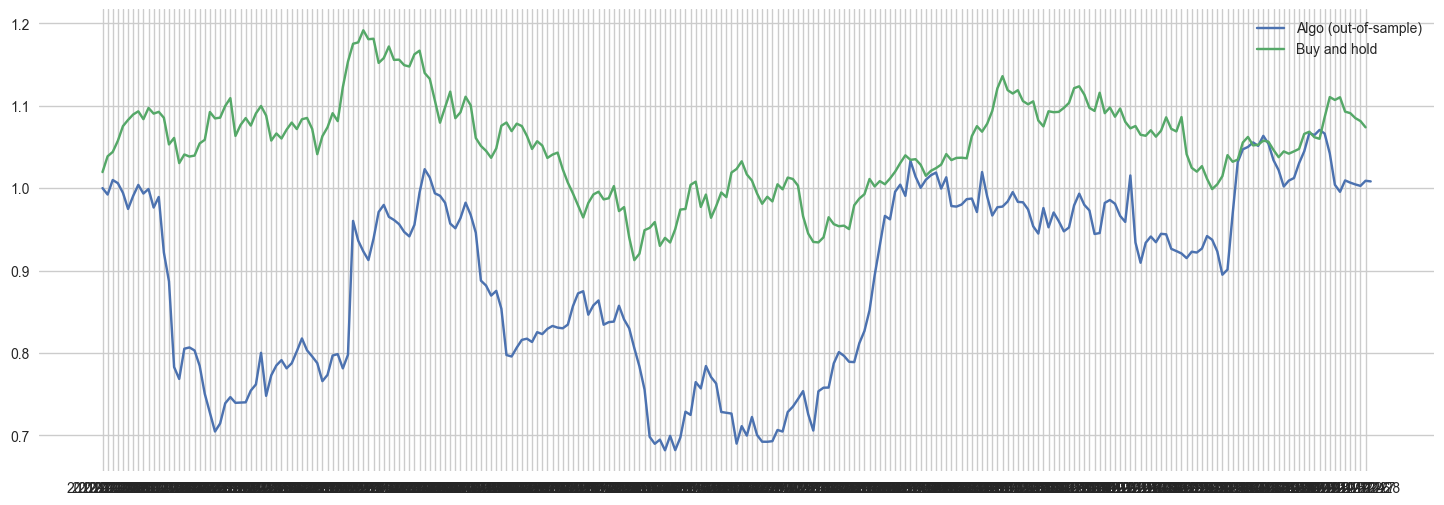

In [19]:
plt.figure(figsize=(18,6))
plt.plot(cumret_oos, label='Algo (out-of-sample)')
plt.plot(cumret_bnh, label='Buy and hold')
plt.legend()

In [24]:
bootstrap_trs = [] # total returns
N = 5000 # number of random tests

for _ in range(N):
    positions_bootstrap = shuffle_positions(positions_oos)
    ret = (positions_bootstrap.shift() * returns_trade[[s1,s2,s3,s4]]).sum(axis=1) * 2 # double the amount of capital
    cumret_bootstrap = np.nancumprod(ret+1)
    bootstrap_trs.append(calculate_metrics(cumret_bootstrap)[0]) # save total return
    
bootstrap_trs = np.array(bootstrap_trs)

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51712/4134292835.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rets = pd.DataFrame(cumret).pct_change()
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51712/4134292835.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rets = pd.DataFrame(cumret).pct_change()
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51712/4134292835.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.inf

In [25]:
# cumulative returns of each stock
cumret_all = (prices_trade.pct_change().dropna() + 1).cumprod(axis=0)

results_df = pd.DataFrame(columns=['Total return', 'APR', 'Sharpe', 
                                   'maxDD', 'maxDDD', '% random portfolios beaten'])
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s1])
pct_beaten = 'NA'
results_df.loc[s1] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s2])
results_df.loc[s2] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s3])
results_df.loc[s3] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s4])
results_df.loc[s4] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_bnh)
results_df.loc['Buy and hold'] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten

total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_oos)
pct_beaten = 100 * (1 - len(bootstrap_trs[bootstrap_trs>total_return]) / len(bootstrap_trs))
results_df.loc['Algo (out-of-sample)'] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51712/4134292835.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (cumret[-1] - cumret[0])/cumret[0]
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51712/4134292835.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_51712/4134292835.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [26]:
results_df

Total return       APR    Sharpe     maxDD  maxDDD  \
ZION                      0.235333  0.239552  0.864399 -0.221754   196.0   
NUAN                     -0.158037 -0.160369 -0.280968 -0.358292   222.0   
FHN                       0.179410  0.182553  0.701343 -0.306703   194.0   
PBCT                     -0.041452 -0.042106 -0.165976 -0.148550   240.0   
Buy and hold              0.053262  0.054144  0.345305 -0.234123   196.0   
Algo (out-of-sample)      0.008132  0.008230  0.238193 -0.333479    94.0   

                     % random portfolios beaten  
ZION                                         NA  
NUAN                                         NA  
FHN                                          NA  
PBCT                                         NA  
Buy and hold                                 NA  
Algo (out-of-sample)                      59.82

In [29]:
metrics = ['Best day', 'Worst day', 'Percentage of up days', 'Percentage of down days', 
           'Average daily gain', 'SD of positive returns', 'Average daily loss', 
           'SD of negative returns']

results_add_df = pd.DataFrame(index=metrics, columns=['Algo (out-of-sample)','Buy and hold',s1,s2,s3,s4])

results_add_df['Algo (out-of-sample)'] = calculate_metrics_add(ret_oos)
results_add_df['Buy and hold'] = calculate_metrics_add(ret_bnh)
results_add_df[s1] = calculate_metrics_add(returns_trade[s1])
results_add_df[s2] = calculate_metrics_add(returns_trade[s2])
results_add_df[s3] = calculate_metrics_add(returns_trade[s3])
results_add_df[s4] = calculate_metrics_add(returns_trade[s4])

In [30]:
results_add_df

Algo (out-of-sample)  Buy and hold      ZION  \
Best day                             0.203698      0.038229  0.104966   
Worst day                           -0.117206     -0.041371 -0.075472   
Percentage of up days                0.481928      0.546559  0.550201   
Percentage of down days              0.514056      0.453441  0.433735   
Average daily gain                   0.020073      0.010743  0.014171   
SD of positive returns               0.023176      0.008207  0.012454   
Average daily loss                  -0.017999     -0.012253 -0.015122   
SD of negative returns               0.018249      0.009735  0.012836   

                             NUAN       FHN      PBCT  
Best day                 0.092544  0.044513  0.025244  
Worst day               -0.129885 -0.078313 -0.038831  
Percentage of up days    0.449799  0.542169  0.493976  
Percentage of down days  0.542169  0.441767  0.485944  
Average daily gain       0.019012  0.014457  0.008404  
SD of positive returns   0.016445  0.011398  0.005944  
Average daily loss      -0.016297 -0.015455 -0.008576  
SD of negative returns   0.015270  0.014227  0.007707

In [32]:
corr_df = pd.DataFrame(index=[s1,s2,s3,s4], columns=['Algo (out-of-sample)'])

for s in corr_df.index:
    corr_df.loc[s] = np.corrcoef(returns_trade[s], ret_oos.astype(float))[0,1]
    
corr_df

Algo (out-of-sample)
ZION             0.216037
NUAN            -0.009871
FHN               0.07527
PBCT              0.15179

In [33]:
returns_trade[[s1,s2,s3,s4]].corr()

ZION      NUAN       FHN      PBCT
ZION  1.000000  0.391611  0.688135  0.572434
NUAN  0.391611  1.000000  0.391281  0.385507
FHN   0.688135  0.391281  1.000000  0.624520
PBCT  0.572434  0.385507  0.624520  1.000000